In [23]:
import pandas as pd 
from pysentimiento import create_analyzer
import matplotlib.pyplot as plt 
import numpy as np 

### Irony inspection 

In [33]:
data = pd.read_csv('pysentimiento_data_validation.csv')
data.head()

,mention,url,RC1,RC2,RC3,Sentiment predicted,Sentiment expected
0,"alberto fernandez, ya en diciembre del 17, se...",https://www.perfil.com/noticias/periodismopuro...,0,1,1,1,1
1,"concretamente, con sustento en todas las expl...",https://www.infobae.com/politica/2019/04/01/nu...,0,0,0,0,0
2,suscribite a el destape los legisladores pr...,https://www.eldestapeweb.com/nota/elecciones-2...,1,1,1,1,1
3,"de esa forma, amplio la posibilidad de recibi...",https://www.perfil.com/noticias/politica/mauri...,1,-1,-1,0,0
4,lograron de puno y letra la adhesion de macri,https://www.cronista.com/economia-politica/Mac...,1,1,0,0,1


In [34]:
# Irony analyzer
analyzer = create_analyzer(task="irony", lang="es")

/home/spinto/Proyectos/general_env/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [35]:
# Irony classification
classification = data.mention.apply(lambda x: analyzer.predict(x))

data['irony_classification'] = [classification.to_list()[i].output for i in range(classification.shape[0])]
data['irony_probability'] = [classification.to_list()[i].probas['ironic'] for i in range(classification.shape[0])]

In [36]:
data.head(n = 5)

,mention,url,RC1,RC2,RC3,Sentiment predicted,Sentiment expected,irony_classification,irony_probability
0,"alberto fernandez, ya en diciembre del 17, se...",https://www.perfil.com/noticias/periodismopuro...,0,1,1,1,1,not ironic,0.018702
1,"concretamente, con sustento en todas las expl...",https://www.infobae.com/politica/2019/04/01/nu...,0,0,0,0,0,not ironic,0.000589
2,suscribite a el destape los legisladores pr...,https://www.eldestapeweb.com/nota/elecciones-2...,1,1,1,1,1,not ironic,0.000693
3,"de esa forma, amplio la posibilidad de recibi...",https://www.perfil.com/noticias/politica/mauri...,1,-1,-1,0,0,not ironic,0.002432
4,lograron de puno y letra la adhesion de macri,https://www.cronista.com/economia-politica/Mac...,1,1,0,0,1,not ironic,0.028098


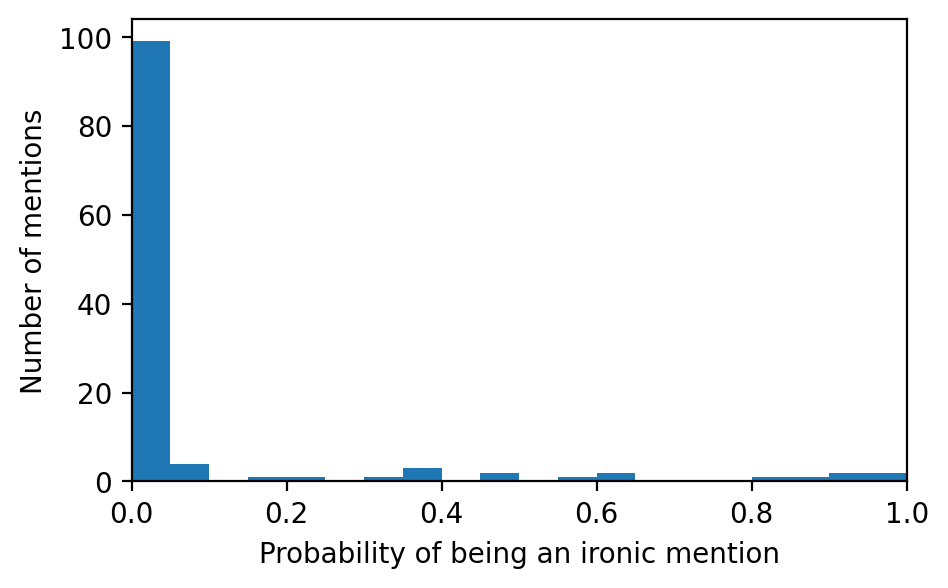

In [37]:
plt.figure(dpi = 200, figsize = (5,3))

plt.hist(data['irony_probability'].to_list(), bins = np.arange(0.00, 1.01, 0.05))
plt.xlim([0.00, 1.00])
plt.xlabel('Probability of being an ironic mention', size = 10)
plt.ylabel('Number of mentions', size = 10)
plt.show()